In [1]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from data import *
from evaluation import *
%matplotlib inline

### 加载数据集

In [2]:
data_dir = 'u.data' 
N, M, data_list, _ = load_data(file_dir=data_dir)
print(' data length: %d \n user number: %d \n item number: %d' %(len(data_list),N,M))

 data length: 100000 
 user number: 943 
 item number: 1682


### 分割数据集

In [3]:
train_list, test_list = train_test_split(data_list,test_size=0.2)
print ('train length: %d \n test length: %d' %(len(train_list),len(test_list)))

train length: 80000 
 test length: 20000


### 将 list 转换成 矩阵

In [4]:
train_mat = sequence2mat(sequence = train_list, N = N, M = M)
test_mat = sequence2mat(sequence = test_list, N = N, M = M)

### 参数设置

In [5]:
learning_rate = 0.005
lamda_regularizer = 0.1
max_iteration = 100
K = 10

### 4. 权重矩阵分解 （WMF）

 step:0 
 mae:1.8643,rmse:2.3299,recall:0.0203,precision:0.0431
 step:1 
 mae:0.8486,rmse:1.1102,recall:0.0722,precision:0.1530
 step:2 
 mae:0.8368,rmse:1.0983,recall:0.0774,precision:0.1642
 step:3 
 mae:0.8326,rmse:1.0950,recall:0.0784,precision:0.1662
 step:4 
 mae:0.8303,rmse:1.0932,recall:0.0791,precision:0.1678
 step:5 
 mae:0.8289,rmse:1.0918,recall:0.0788,precision:0.1670
 step:6 
 mae:0.8280,rmse:1.0910,recall:0.0785,precision:0.1666
 step:7 
 mae:0.8274,rmse:1.0906,recall:0.0792,precision:0.1680
 step:8 
 mae:0.8271,rmse:1.0907,recall:0.0781,precision:0.1656
 step:9 
 mae:0.8268,rmse:1.0910,recall:0.0788,precision:0.1670
 end. 
 mae:0.8268,rmse:1.0910,recall:0.0788,precision:0.1670
MAE:0.8268;RMSE:1.0910;Recall:0.0788;Precision:0.1670


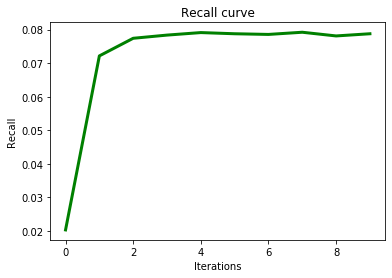

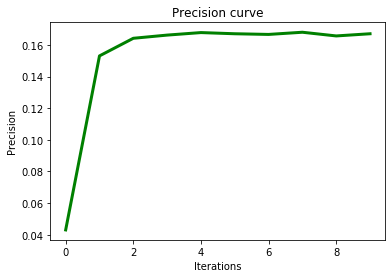

In [6]:
from wmf import *
max_iteration = 10
alpha=40
model = wmf(train_list=train_list, 
            test_list=test_list, 
            N=N, 
            M=M,
            K=K,
            alpha=alpha,
            lamda_regularizer=lamda_regularizer, 
            max_iteration=max_iteration)
P, Q, records_array = model.train()
print('MAE:%.4f;RMSE:%.4f;Recall:%.4f;Precision:%.4f'
      %(records_array[:,0][-1],records_array[:,1][-1],records_array[:,2][-1],records_array[:,3][-1]))

figure(values_list=records_array[:,2],name='Recall')
figure(values_list=records_array[:,3],name='Precision')